<a href="https://colab.research.google.com/github/Mekeih-MSU/COSC354-Midterm/blob/main/OS_Malware_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

In our machine learning project, we focus on the pressing issue of malware within the Android operating system, a prevalent platform in today's digital landscape. As Android devices become increasingly integrated into daily life, they also become prime targets for malicious software, posing significant risks to user privacy and device functionality. Our goal is to utilize machine learning techniques to detect and differentiate between benign and malicious applications effectively. By analyzing application behaviors and features, we aim to develop a predictive model that enhances the security measures against malware threats on Android devices.

In [58]:
# Import the libraries we'll use below.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import glob
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,auc

# Data for Binary Classification

## Load Data

In [59]:
#Mount google drive to colab
from google.colab import drive
drive.mount('/content/drive')

benign_csv_files = glob.glob('/content/drive/My Drive/OS Malware ML Project/Benign/cur/*.csv')
malware_csv_files_1 = glob.glob('/content/drive/My Drive/OS Malware ML Project/SMSmalware/cur/*.csv')
malware_csv_files_2 = glob.glob('/content/drive/My Drive/OS Malware ML Project/Ransomware/cur/*.csv')

#Create data frames for training and leader board testing data
benign_files_df = pd.concat([pd.read_csv(filename) for filename in benign_csv_files], ignore_index=True)
malware_files_1_df = pd.concat([pd.read_csv(filename) for filename in malware_csv_files_1], ignore_index=True)
malware_files_2_df = pd.concat([pd.read_csv(filename) for filename in malware_csv_files_2], ignore_index=True)

benign_files_df = benign_files_df.drop_duplicates()
malware_files_1_df = malware_files_1_df.drop_duplicates()
malware_files_2_df = malware_files_2_df.drop_duplicates()

display(benign_files_df)
display(malware_files_1_df)
display(malware_files_2_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.42.0.151-31.13.71.3-52294-443-6,10.42.0.151,52294,31.13.71.3,443,6,23/06/2017 03:55:53,228990,6,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,172.217.10.14-10.42.0.151-443-43351-6,10.42.0.151,43351,172.217.10.14,443,6,23/06/2017 03:56:03,37114,1,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,172.217.12.163-10.42.0.151-443-42880-6,10.42.0.151,42880,172.217.12.163,443,6,23/06/2017 03:56:02,777790,54,204,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,10.42.0.151-36.110.213.49-35191-80-6,10.42.0.151,35191,36.110.213.49,80,6,23/06/2017 03:56:02,517335,3,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,10.42.0.151-36.110.213.49-35191-80-6,10.42.0.151,35191,36.110.213.49,80,6,23/06/2017 03:56:03,21106,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49131,10.42.0.211-10.42.0.1-27522-53-17,10.42.0.211,27522,10.42.0.1,53,17,23/06/2017 02:41:04,136698,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
49132,10.42.0.211-98.139.180.180-49889-443-6,10.42.0.211,49889,98.139.180.180,443,6,23/06/2017 02:41:06,13174890,3,0,...,20,31535.0,0.0,31535.0,31535.0,13143355.0,0.0,13143355.0,13143355.0,BENIGN
49133,10.42.0.211-10.42.0.1-37390-53-17,10.42.0.211,37390,10.42.0.1,53,17,23/06/2017 02:41:04,48840,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
49134,10.42.0.211-23.208.86.153-41299-443-6,10.42.0.211,41299,23.208.86.153,443,6,23/06/2017 02:43:10,11,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.42.0.211-111.1.17.152-33227-8077-6,10.42.0.211,33227,111.1.17.152,8077,6.0,30/06/2017 11:04:20,505853.0,3.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_FAKENOTIFY
1,10.42.0.211-111.1.17.152-33227-8077-6,111.1.17.152,8077,10.42.0.211,33227,6.0,30/06/2017 11:04:20,1162.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_FAKENOTIFY
2,10.42.0.211-111.1.17.152-48437-8077-6,10.42.0.211,48437,111.1.17.152,8077,6.0,30/06/2017 11:04:20,324713.0,3.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_FAKENOTIFY
3,10.42.0.211-111.1.17.152-48437-8077-6,111.1.17.152,8077,10.42.0.211,48437,6.0,30/06/2017 11:04:21,1037.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_FAKENOTIFY
4,10.42.0.211-111.1.17.152-49409-8077-6,10.42.0.211,49409,111.1.17.152,8077,6.0,30/06/2017 11:04:38,366136.0,3.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_FAKENOTIFY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26496,10.42.0.151-36.110.213.49-57067-443-6,10.42.0.151,57067,36.110.213.49,443,6.0,11/07/2017 02:39:33,10541529.0,9.0,8.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_FAKEMART
26497,10.42.0.151-36.110.213.49-45968-80-6,10.42.0.151,45968,36.110.213.49,80,6.0,11/07/2017 02:39:42,1744429.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_FAKEMART
26498,10.42.0.151-36.110.213.49-45962-80-6,10.42.0.151,45962,36.110.213.49,80,6.0,11/07/2017 02:39:43,608533.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_FAKEMART
26499,10.42.0.151-36.110.213.49-45964-80-6,10.42.0.151,45964,36.110.213.49,80,6.0,11/07/2017 02:39:43,445981.0,2.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SMSMALWARE_FAKEMART


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.12.142-10.42.0.211-443-42592-6,10.42.0.211,42592,172.217.12.142,443,6,30/08/2017 08:42:23,239830,6,7,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
1,172.217.12.142-10.42.0.211-443-42592-6,10.42.0.211,42592,172.217.12.142,443,6,30/08/2017 08:42:23,879,3,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
2,172.217.12.142-10.42.0.211-443-34932-6,10.42.0.211,34932,172.217.12.142,443,6,30/08/2017 08:42:24,36464,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
3,206.126.112.142-10.42.0.211-443-50496-6,10.42.0.211,50496,206.126.112.142,443,6,30/08/2017 08:42:23,866460,135,1054,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
4,172.217.6.234-10.42.0.211-443-37196-6,10.42.0.211,37196,172.217.6.234,443,6,30/08/2017 08:42:25,36527,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_CHARGER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35752,10.42.0.151-10.42.0.1-53849-53-17,10.42.0.151,53849,10.42.0.1,53,17,23/08/2017 04:45:14,24707,1,1,...,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_WANNALOCKER
35753,10.42.0.151-96.126.100.203-34559-123-17,10.42.0.151,34559,96.126.100.203,123,17,23/08/2017 04:43:31,81388,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_WANNALOCKER
35754,10.42.0.151-10.42.0.1-23177-53-17,10.42.0.151,23177,10.42.0.1,53,17,23/08/2017 04:43:38,61591,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_WANNALOCKER
35755,10.42.0.151-10.42.0.1-30407-53-17,10.42.0.151,30407,10.42.0.1,53,17,23/08/2017 04:44:56,24831,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RANSOMWARE_WANNALOCKER


## Train/Test split

In [60]:
#Split all of the files into testing and training data

# Combine the two DataFrames
all_files_df = pd.concat([benign_files_df, malware_files_1_df, malware_files_2_df], ignore_index=True)

# Shuffle the combined DataFrame
all_files_df = all_files_df.sample(frac=1).reset_index(drop=True)

# Drop unwanted features
columns_to_drop = ['Flow ID' , ' Source IP', ' Source Port', ' Destination IP', ' Destination Port',	' Protocol', ' Timestamp', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
all_files_df.drop(columns_to_drop, axis=1, inplace=True)

# Uniform data
def remove_strings(x):
    if type(x) == str: return np.nan
    return x

for col in all_files_df:
  if col == ' Label': continue
  all_files_df[col] = all_files_df[col].apply(remove_strings)

all_files_df.dropna(inplace=True)

# Reasign labels
all_files_df[' Label'] = np.where(all_files_df[' Label'] == 'BENIGN', 1, 0)

# Shuffle rows
all_files_df = all_files_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split ~(80/20) the combined DataFrame into training and testing sets
training_data_df, testing_data_df = all_files_df[:85474], all_files_df[85474:]

# Create separate variables for features (inputs) and labels (outputs).
# We will be using these in the cells below.
X_train, Y_train = training_data_df.drop(' Label', axis=1), training_data_df[' Label']
X_test, Y_test = testing_data_df.drop(' Label', axis=1), testing_data_df[' Label']

# Confirm the data shapes are as expected.
print('train data shape:', X_train.shape)
print('train labels shape:', Y_train.shape)
print('test data shape:', X_test.shape)
print('test labels shape:', Y_test.shape)

display(all_files_df)

train data shape: (85474, 71)
train labels shape: (85474,)
test data shape: (21369, 71)
test labels shape: (21369,)


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,106422225.0,16.0,20.0,4335.0,3374.0,1083.0,0.0,270.937500,465.040854,656.0,...,32.0,161282.333333,22605.2964,185887.0,141433.0,35265108.00,6.602989e+06,40524144.0,27854756.0,0
1,8296887.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,32.0,0.000000,0.0000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0
2,19390371.0,9.0,7.0,454.0,4572.0,199.0,0.0,50.444444,81.259017,1418.0,...,32.0,0.000000,0.0000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0
3,12198212.0,19.0,21.0,1456.0,8669.0,364.0,0.0,76.631579,152.462823,1460.0,...,20.0,0.000000,0.0000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1
4,104333027.0,5.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0000,0.0,0.0,26083256.75,3.876312e+06,31834380.0,23759822.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106838,31588.0,1.0,1.0,42.0,142.0,42.0,42.0,42.000000,0.000000,142.0,...,20.0,0.000000,0.0000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1
106839,15912115.0,2.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,32.0,0.000000,0.0000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,0
106840,4854860.0,3.0,2.0,106.0,0.0,53.0,0.0,35.333333,30.599564,0.0,...,20.0,0.000000,0.0000,0.0,0.0,0.00,0.000000e+00,0.0,0.0,1
106841,9890000.0,5.0,6.0,568.0,187.0,517.0,0.0,113.600000,226.586187,156.0,...,32.0,116523.000000,0.0000,116523.0,116523.0,9773463.00,0.000000e+00,9773463.0,9773463.0,0


# Data Analysis

In the realm of cybersecurity, particularly in malware detection for Android operating systems, data analysis stands as a cornerstone in understanding and combating malware threats. Through meticulous analysis, we aim to uncover underlying patterns and characteristics that differentiate benign applications from malicious ones. This project employs a multifaceted approach to data analysis, leveraging both visual and statistical techniques to gain deeper insights into our dataset.

## Correlation Matrix

To begin, our analysis incorporates a correlation heatmap to visualize the relationships between different features within our dataset. This heatmap not only highlights the degree to which variables are interrelated but also uncovers potential redundancies and unique influencers that could impact our model's performance. By understanding these correlations, we can refine our feature set, focusing on those elements that offer the most value in distinguishing between benign and malware applications.

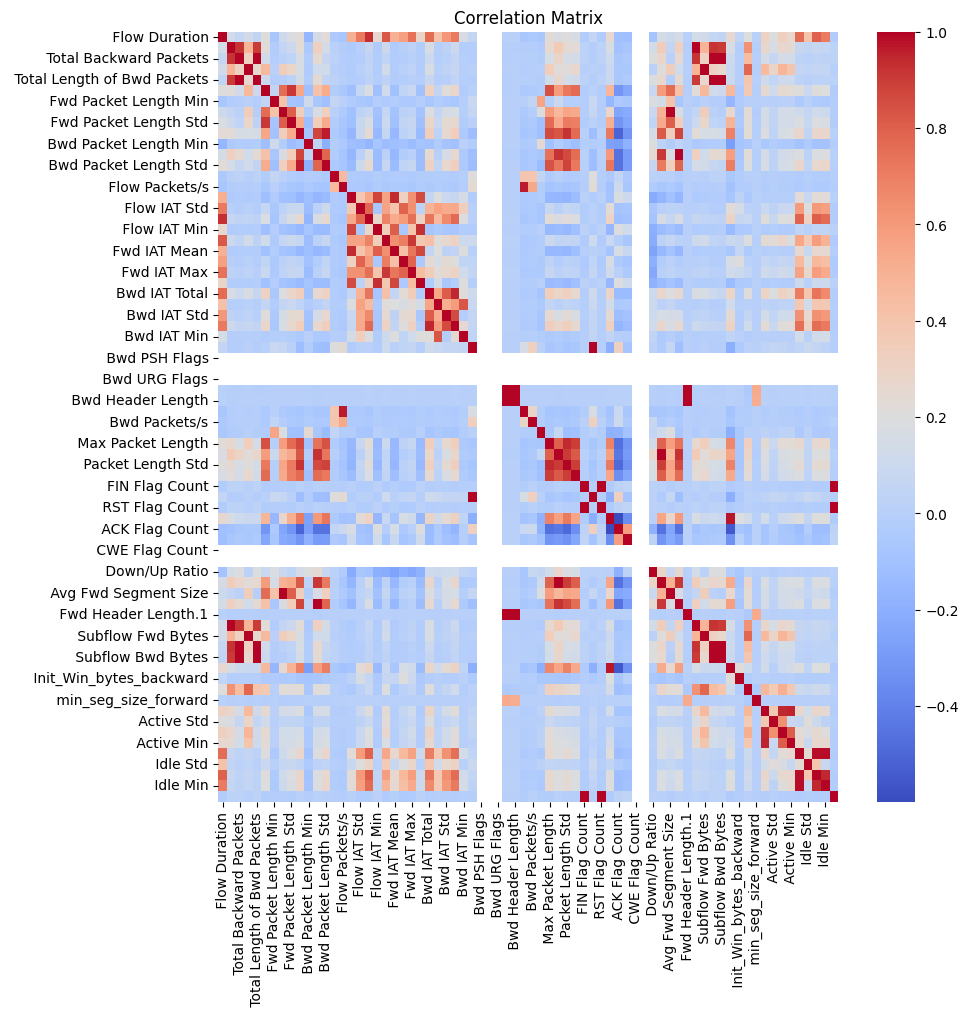

In [61]:
correlation_matrix = training_data_df.corr()  # Calculates the correlation matrix

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Class Distribution

Next, we explore the class distribution within our dataset through a pie chart. This visual representation allows us to assess the balance between benign and malware instances, providing a clear picture of the dataset's composition. Such information is crucial for understanding the challenges we may face during model training, especially in dealing with potential class imbalances.

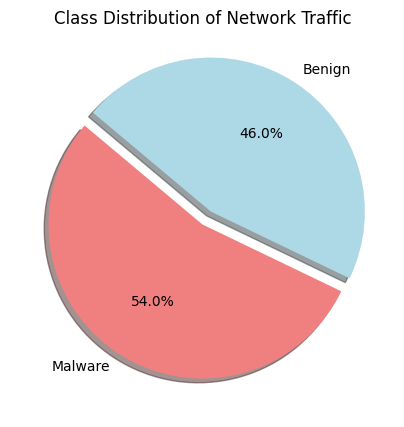

In [62]:
# Plot the class distribution using a pie chart

# Determine the counts of malware vs not malware
malware_count = sum(label == 0 for label in Y_train)
benign_count = sum(label == 1 for label in Y_train)

# Prepare data for the pie chart
sizes = [malware_count, benign_count]
labels = ['Malware', 'Benign']
colors = ['lightcoral', 'lightblue']
explode = (0, 0.1)  # explode the 2nd slice (Malware)

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Class Distribution of Network Traffic')
plt.show()

## Packet Lengths

Finally, we delve into the specifics of application behavior by examining the packet lengths associated with both benign and malware classes. Histograms serve as our tool of choice for this analysis, offering a detailed view of the distribution of packet lengths within each class. This step is vital for identifying distinctive patterns in network traffic that could be indicative of malicious activity, thereby aiding in the feature selection process for our machine learning models.

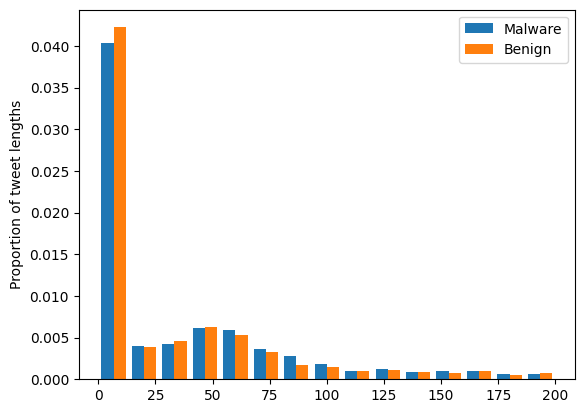

In [63]:
training_data_indices = training_data_df.index

malware_package_lengths = [x for (i, x) in enumerate(X_train[" Packet Length Mean"]) if not Y_train[i]]
benign_package_lengths = [x for (i, x) in enumerate(X_train[" Packet Length Mean"]) if Y_train[i]]

# The histogram function can take a list of inputs and corresponding labels.
plt.hist([malware_package_lengths, benign_package_lengths], bins=15, range=(0, 200),
         label=['Malware', 'Benign'], density=True)
plt.legend()
plt.ylabel('Proportion of tweet lengths')
plt.show()

# Confusion Matrix
A confusion matrix is a tool that is commonly used in machine learning to evaluate the performance of a classification model. It is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by the model.

A **true positive** is an outcome where the model correctly predicts the positive class. Similarly, a **true negative** is an outcome where the model correctly predicts the negative class.

A **false positive** is an outcome where the model incorrectly predicts the positive class. And a **false negative** is an outcome where the model incorrectly predicts the negative class.

Using these, we can construct a **confusion matrix**, a table that summarizes performance using these 4 result categories.

|                     |Malware (Predicted)    | Benign (Predicted) |
|---------------------|-----------------|------------------|
| **Malware (Actual)**     | Number of True Positives  | Number of False Negatives  |
| **Benign (Actual)** | Number of False Positives | Number of True Negatives   |

As we conduct experiments, the confusion matrix will serve as a valuable tool for evaluating the performance of the resulting classification models.

# F1 Score
F1 score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model.

**Precision** is the proportion of positive predictions that were actually correct:

\begin{equation}
Precision = \frac{TP}{TP + FP}
\end{equation}

**Recall** is the proportion of actual positives that were predicted correctly:

\begin{equation}
Recall = \frac{TP}{TP + FN}
\end{equation}

**F1 Score** is the harmonic mean of the precision and recall scores, as shown below. It ranges from 0-100%, and a higher F1 score denotes a better quality classifier:

\begin{equation}
F_1= \frac{2*Precision*Recall}{Precision + Recall}
\end{equation}

As we conduct experiments, the F1 score will be the primary metric used for evaluating the performance of the resulting classification models.

# Baseline

A baseline is the performance metric that serves as a starting point for comparison with other models. It is often the simplest model or the most common class in the dataset. The baseline serves as a point of reference for evaluating the performance of other models.

## All Positive Baseline
Below we will create a simple baseline that always assumes the Positive (benign) class.

In [64]:
def all_positive_class_basline():
  """
  Simple baseline that always assumes the positive (benign) class.
  """
  return 1


# Run baseline model on the training and vaildation data sets.
X_train_all_positive_class_basline_predictions = [all_positive_class_basline() for i in range(len(X_train))]
X_test_all_positive_class_basline_predictions = [all_positive_class_basline() for i in range(len(X_test))]

# Confirm the data shapes are as expected.
print(len(X_train_all_positive_class_basline_predictions))

85474


In [65]:
# Compute F1 score on the training and vaildation data sets.

print('All benign basline model F1 scores: ')
print('Training Data: ' + str(f1_score(Y_train, X_train_all_positive_class_basline_predictions)))
print('Testing Data: ' + str(f1_score(Y_test, X_test_all_positive_class_basline_predictions)))

All benign basline model F1 scores: 
Training Data: 0.6303889756840123
Testing Data: 0.6286099345398536


## Baseline Performance Summary
Here we will keep track of the best F1 scores each model records.

|Model|Training|Validation|
|-|-|-|
|**All Positive Baseline**|0.630|0.629|







In [66]:
def optimal_F1_score_threshold(true_vals, probability_vals):

    # Create an array of threshold values ranging from 0 to 1.
    thresholds = np.arange(0.0, 1.01, 0.01)

    # Initialize variables to store the maximum F1 score and the corresponding optimal threshold.
    max_f1_score = -1
    optimal_threshold = -1

    # Loop through the threshold values to find the one that maximizes the F1 score.
    for threshold in thresholds:

        # Convert the predicted probabilities to binary labels using the current threshold.
        predicted_vals = (probability_vals >= threshold).astype(int)

        # Calculate the F1 score for the current threshold.
        f1 = f1_score(true_vals, predicted_vals)

        # Update the maximum F1 score and the corresponding optimal threshold if the current F1 score is higher.
        if f1 > max_f1_score:
            max_f1_score = f1
            optimal_threshold = threshold

    return optimal_threshold

# Reduce Features

In [67]:
feature_correlation_with_Label = correlation_matrix[' Label'][:-1]
feature_correlation_with_Label = feature_correlation_with_Label.sort_values(ascending=False)

feature_index = {}
for idx, feature in enumerate(feature_correlation_with_Label.index):
  feature_index[feature] = idx

def reduce_features(cutoff):
  for key in feature_index:
    if feature_index[key] >= cutoff:
      X_train.drop(key, axis=1, inplace=True)
      X_test.drop(key, axis=1, inplace=True)

CUT_OFF = 5
reduce_features(CUT_OFF)

# Experiment #1: Logistic Regression

In our first experiment, we turn to Logistic Regression, a foundational machine learning technique renowned for its simplicity and effectiveness in binary classification tasks. The objective of this experiment is to evaluate the capability of Logistic Regression in distinguishing between benign and malicious applications within the Android ecosystem. This model, grounded in statistical probability, offers a straightforward approach to predicting categorical outcomes—making it an ideal starting point for our analysis. By leveraging the features identified during our data analysis phase, including packet lengths and other behavioral indicators, we aim to train a Logistic Regression model that can accurately classify applications based on their likelihood of being malware. This experiment not only serves as a benchmark for the performance of more complex models in subsequent experiments but also provides valuable insights into the linear relationships between features and the target variable.

In [68]:
experiment_1_lr_model = LogisticRegression(random_state=0, max_iter=10000)
experiment_1_lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [69]:
Y_train_lr_model_probas = experiment_1_lr_model.predict_proba(X_train)
Y_test_lr_model_probas = experiment_1_lr_model.predict_proba(X_test)

Y_train_lr_model_probas = Y_train_lr_model_probas[:, 1]
Y_test_lr_model_probas = Y_test_lr_model_probas[:, 1]

Y_train_lr_model_threshold = optimal_F1_score_threshold(Y_train, Y_train_lr_model_probas)
#Y_train_lr_model_threshold = .45

print(f"Best threshold: {Y_train_lr_model_threshold}")

Y_train_lr_model_preds = (experiment_1_lr_model.predict_proba(X_train)[:, 1] >= Y_train_lr_model_threshold).astype(int)
Y_test_lr_model_preds = (experiment_1_lr_model.predict_proba(X_test)[:, 1] >= Y_train_lr_model_threshold).astype(int)

print(f"Train F1 Score: {f1_score(Y_train, Y_train_lr_model_preds)}")
print(f"Test F1 Score: {f1_score(Y_test, Y_test_lr_model_preds)}")
print(Y_train_lr_model_probas)

Best threshold: 0.5
Train F1 Score: 0.765694489047188
Test F1 Score: 0.7654137688520747
[0.50023436 0.5        0.50031757 ... 0.5        0.50822345 0.5       ]


## Experiment #1 Performance Summary

|Model|Training|Validation|
|-|-|-|
|**All Positive Baseline**|0.630|0.629|
|**Experiment #1**|0.766|0.765|


In Experiment #1, our Logistic Regression model demonstrated a marked improvement over the all-positive baseline, reflected in the F1 scores. The baseline model, predicting all samples as positive, achieved F1 scores of 0.630 for training and 0.629 for validation. In contrast, the Logistic Regression model yielded significantly higher F1 scores of 0.766 in training and 0.765 in validation. This performance leap underscores the effectiveness of Logistic Regression in distinguishing between benign and malicious applications within our dataset, highlighting its potential as a valuable tool in malware detection efforts.

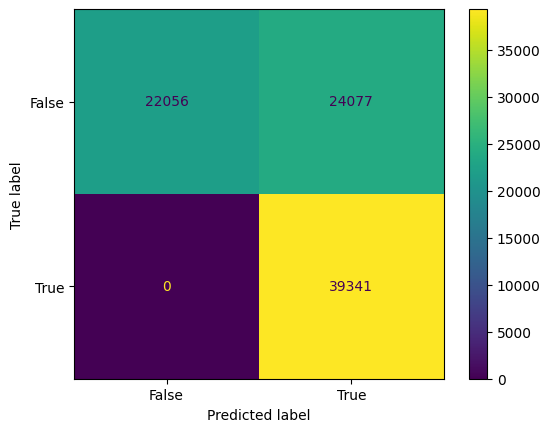

In [70]:
# Building a confusion matrix based off of predictions made on the training data.
confusion_matrix_ex_1 = confusion_matrix(Y_train, Y_train_lr_model_preds)
cm_display_ex_1 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_ex_1, display_labels = [False, True])
cm_display_ex_1.plot()
plt.show()

# Experiment #2: Feed Forward Neural Network

In our second experiment, we advance our exploration into machine learning by deploying a Feed Forward Neural Network (FFNN), a cornerstone of deep learning techniques known for handling complex pattern recognition. This step represents an elevation in our analytical approach, aiming to capture the non-linear intricacies within our Android malware dataset that logistic regression might overlook. The FFNN model is structured with multiple layers of neurons, each followed by activation functions to introduce non-linearity, and dropout layers to mitigate overfitting. Our focus is on fine-tuning this architecture—adjusting layers, neurons, and learning rates—to optimize the balance between accuracy and generalization. By leveraging the FFNN's advanced capabilities, we aspire to significantly improve our ability to classify applications accurately, marking a critical progression in our endeavor to enhance malware detection in the Android ecosystem.

In [71]:
def build_FFNN_model(feature_count):
  """Build a tf.keras model."""
  # Clear session and remove randomness.
  tf.keras.backend.clear_session()
  tf.keras.utils.set_random_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(input_dim=feature_count, units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(input_dim=32, units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(input_dim=32, units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(input_dim=32, units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(
      input_dim=32,
      units=1,                     # output dim (for binary classification)
      activation='sigmoid'         # apply the sigmoid function!
  ))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [72]:
# Function for plotting the learning curves given the training history object we get from Keras.
def plot_history(history):
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.xticks(range(0, len(history['loss'] + 1)))
  plt.plot(history['loss'], label="training", marker='o')
  plt.plot(history['val_loss'], label="validation", marker='o')
  plt.legend()
  plt.show()

Epoch 1/8
1202/1202 [==============================] - 5s 3ms/step - loss: 117.2835 - accuracy: 0.7996 - val_loss: 5.4681 - val_accuracy: 0.8107
Epoch 2/8
1202/1202 [==============================] - 5s 4ms/step - loss: 12.0331 - accuracy: 0.8451 - val_loss: 38.7255 - val_accuracy: 0.8493
Epoch 3/8
1202/1202 [==============================] - 4s 4ms/step - loss: 5.5606 - accuracy: 0.8612 - val_loss: 0.9942 - val_accuracy: 0.8787
Epoch 4/8
1202/1202 [==============================] - 3s 2ms/step - loss: 5.1634 - accuracy: 0.8737 - val_loss: 1.9965 - val_accuracy: 0.8616
Epoch 5/8
1202/1202 [==============================] - 3s 2ms/step - loss: 2.3928 - accuracy: 0.8793 - val_loss: 1.8200 - val_accuracy: 0.8792
Epoch 6/8
1202/1202 [==============================] - 3s 2ms/step - loss: 9.4812 - accuracy: 0.8823 - val_loss: 6.5639 - val_accuracy: 0.8850
Epoch 7/8
1202/1202 [==============================] - 5s 4ms/step - loss: 3.9739 - accuracy: 0.8771 - val_loss: 5.5885 - val_accuracy: 0.

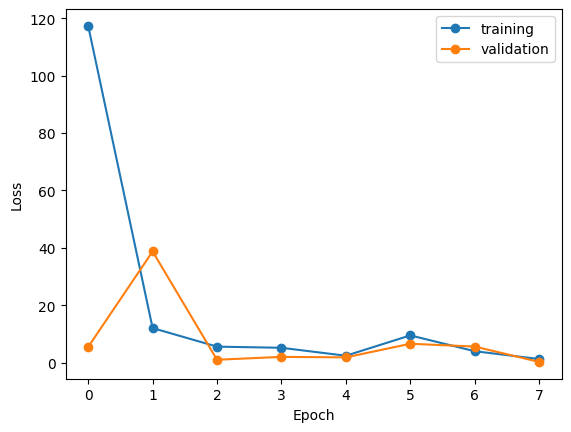

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
ffnn_model = build_FFNN_model(CUT_OFF)

# Fit the model.
history = ffnn_model.fit(
  x = X_train,  # our sparse padded training data
  y = Y_train,          # corresponding binary labels
  epochs=8,             # number of passes through the training data
  batch_size=64,        # mini-batch size
  validation_split=0.1, # use a fraction of the examples for validation
  verbose=1             # display some progress output during training
  )

# Convert the return value into a DataFrame so we can see the train loss
# and binary accuracy after every epoch.
history = pd.DataFrame(history.history)
plot_history(history)
ffnn_model.summary()

In [74]:
# Calculate probabilities for train and test data using the current model.
experiment_2_train_probabilities = ffnn_model.predict(X_train)
experiment_2_test_probabilities = ffnn_model.predict(X_test)

668/668 [==============================] - 1s 2ms/step


In [75]:
# Calculate the optimal threshold based on the probabilities.
threshold = optimal_F1_score_threshold(Y_train, experiment_2_train_probabilities)
#threshold = .47
# Apply the optimal threshold to the train and test probabilities.
experiment_2_train_preds = np.where(experiment_2_train_probabilities >= threshold, 1, 0)
experiment_2_test_preds = np.where(experiment_2_test_probabilities >= threshold, 1, 0)

# Calculate the F1 score the train and test predictions.
f1_train_ex_1 = f1_score(Y_train, experiment_2_train_preds)
f1_test_ex_1 = f1_score(Y_test, experiment_2_test_preds)

# Inspect Scores
print(f"threshold: {threshold}")
print(f"Train F1 score: {f1_train_ex_1}")
print(f"Test F1 score: {f1_test_ex_1}")

threshold: 0.3
Train F1 score: 0.8935006038498509
Test F1 score: 0.8943976202280616


## Experiment #2 Performance Summary

|Model|Training|Validation|
|-|-|-|
|**All Positive Baseline**|0.630|0.629|
|**Experiment #1**|0.766|0.765|
|**Experiment #2**|0.894|0.894|

In Experiment #2, our exploration with a Feedforward Neural Network yielded a remarkable advancement in performance, achieving F1 scores of 0.894 for both training and validation. This demonstrates a significant leap from the previous models, including the all-positive baseline and the logistic regression model used in Experiment #1. The neural network's ability to capture complex, nonlinear relationships in the data has proven exceptionally effective for the task at hand, distinguishing benign from malicious applications with high precision. This result highlights the neural network's robustness and adaptability, making it a potent tool in the arsenal against malware threats on Android platforms.

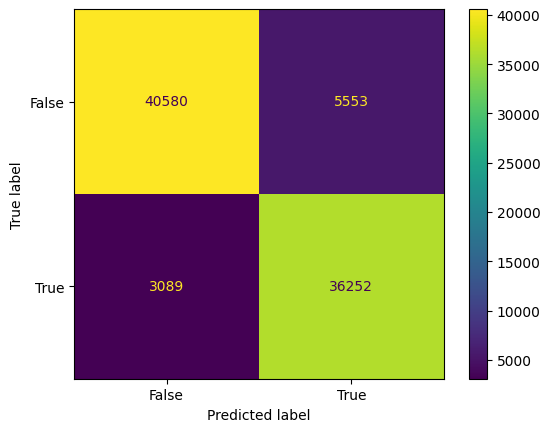

In [76]:
# Building a confusion matrix based off of predictions made on the training data.
confusion_matrix_ex_2 = confusion_matrix(Y_train, experiment_2_train_preds)
cm_display_ex_2 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_ex_2, display_labels = [False, True])
cm_display_ex_2.plot()
plt.show()

# Conclusion


Our journey through the intricate landscape of machine learning to tackle malware detection in Android systems has provided us with profound insights and valuable lessons. From the initial explorations with logistic regression to the more complex realms of Feed Forward Neural Networks, each experiment has contributed to a deeper understanding of the challenges and potentials in identifying malicious applications. The varying degrees of success across different models underscore the complexity of malware detection and the importance of continued innovation in machine learning techniques. As we move forward, it is clear that the battle against malware is an evolving challenge, requiring adaptive and sophisticated approaches. This project not only highlights the critical role of machine learning in enhancing cybersecurity but also sets the stage for future exploration and development in the field. By building upon the foundations laid and the data analyzed, we can continue to refine our models, explore new methodologies, and strive towards creating a safer digital environment for Android users worldwide.